In [5]:
import os

To run this notebook, you must set your mapbox access token into your OS environment variable named MAPBOX_ACCESS_TOKEN.  If you are on MacOS or Linux, you can add a line into ~/.bash_profile

In [7]:
zoom_level = 16
latitude = 29.77
#latitude = 29.7604
longitude = -95.3698

In [13]:
from mapbox import StaticStyle

service = StaticStyle()
service.session.params['access_token'] = os.environ['MAPBOX_ACCESS_TOKEN']

response = service.image(
    username='mapbox',
    style_id='streets-v9',
    lon=longitude, lat=latitude, zoom=zoom_level)

response.status_code

response.headers['Content-Type']

with open('./tmp/static.png', 'wb') as output:
    _ = output.write(response.content)

In [14]:
#satellite
response = service.image(
    username='mapbox',
    style_id='satellite-v9',
    lon=longitude, lat=latitude, zoom=zoom_level)

response.status_code

response.headers['Content-Type']

with open('./tmp/static_sat.png', 'wb') as output:
    _ = output.write(response.content)

In [15]:
# satellite-streets-v10
response = service.image(
    username='mapbox',
    style_id='satellite-streets-v10',
    lon=longitude, lat=latitude, zoom=zoom_level)

response.status_code

response.headers['Content-Type']

with open('./tmp/static_sat_st.png', 'wb') as output:
    _ = output.write(response.content)

In [16]:
# light
response = service.image(
    username='mapbox',
    style_id='light-v9',
    lon=longitude, lat=latitude, zoom=zoom_level)

response.status_code

response.headers['Content-Type']

with open('./tmp/static_light.png', 'wb') as output:
    _ = output.write(response.content)

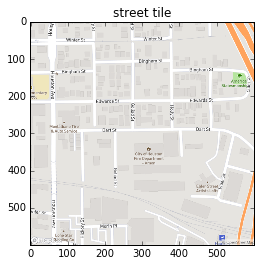

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

street_tile_img = cv2.imread('./tmp/static.png', cv2.IMREAD_UNCHANGED)
#cv2.imshow('street',street_tile_img)

new_style = {'grid': False}
# visualize
plt.imshow(cv2.cvtColor(street_tile_img, cv2.COLOR_BGR2RGB))
plt.title('street tile')


In [19]:
np.unique(street_tile_img[:,:,2])

array([ 28,  39,  42,  48,  56,  57,  58,  72,  82,  86,  87,  93,  94,
        98, 102, 103, 104, 108, 110, 112, 113, 118, 120, 121, 123, 124,
       133, 136, 137, 140, 142, 148, 149, 150, 151, 152, 156, 157, 166,
       167, 169, 172, 174, 175, 181, 182, 183, 187, 188, 190, 193, 196,
       199, 200, 202, 204, 205, 206, 208, 209, 212, 213, 215, 216, 217,
       218, 220, 221, 222, 224, 227, 228, 230, 231, 232, 235, 236, 237,
       239, 240, 241, 244, 245, 246, 247, 248, 249, 250, 251, 252, 255], dtype=uint8)

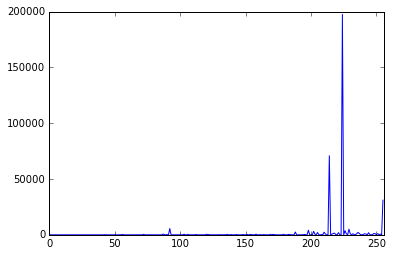

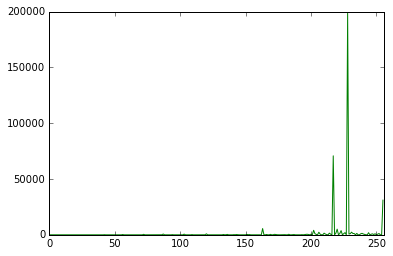

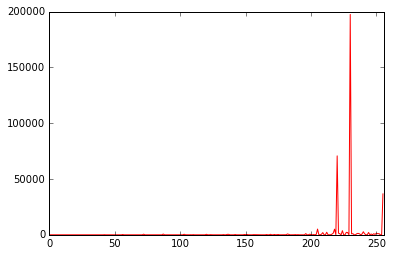

In [20]:
from matplotlib import pyplot as plt

img = cv2.imread('./tmp/static.png', cv2.IMREAD_UNCHANGED)
color = ('b','g','r')
for i,col in enumerate(color):
     histr = cv2.calcHist([img],[i],None,[256],[0,256])
     plt.plot(histr,color = col)
     plt.xlim([0,256])
     plt.show()


In [21]:
img.shape

(600, 600, 3)

[False  True]


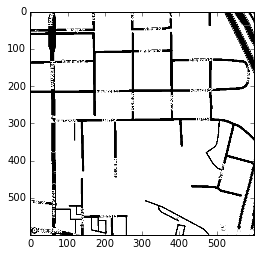

In [22]:
from unet.maskprocessor import *

super_mask = get_street_mask(img)
print(np.unique(super_mask))

plt.imshow(super_mask, cmap=plt.cm.binary)
new_style = {'grid': False}

In [23]:
#super_mask.shape
test_mask = np.expand_dims(super_mask, axis=2)
print(test_mask.shape)

(600, 600, 1)


[False  True]


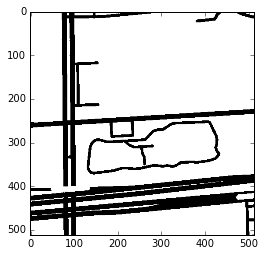

In [24]:
img = cv2.imread('./tmp/custom_street.png', cv2.IMREAD_UNCHANGED)

super_mask = get_street_mask(img)
print(np.unique(super_mask))

plt.imshow(super_mask, cmap=plt.cm.binary)
new_style = {'grid': False}